<a href="https://colab.research.google.com/github/giosa/topicos_II/blob/main/Clasificador_de_imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [68]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)


In [69]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr

In [70]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [71]:
nombre_clases = metadatos.features['label'].names

In [72]:
nombre_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [73]:
# Normalizar los datos
def normalizar(imagenes, etiquetas):
  imagenes =tf.cast(imagenes, tf.float32)
  imagenes /= 255 # se pasa de 255 a 0-1
  return imagenes, etiquetas

# Normalizar los datos de entrenamiento y prueba con la función hecha
datos_entrenamientos = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

# Migrar a cache, usar memoria en lugar del disco, hace un entrenamiento más reapido "segun"
datos_entrenamientos = datos_entrenamientos.cache()
datos_pruebas = datos_pruebas.cache()


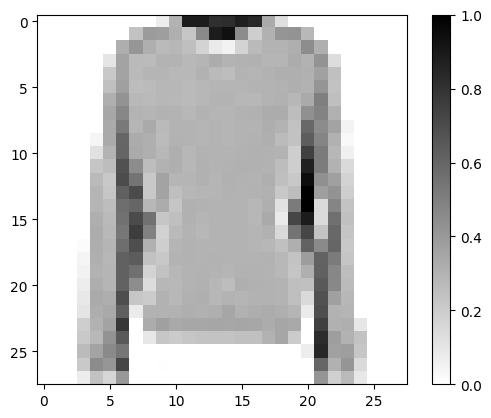

In [74]:
# Mostramos una imagen de los datos de prueba
for imagen, etiqueta in datos_entrenamientos.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) # Redimensionamos la imagen

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


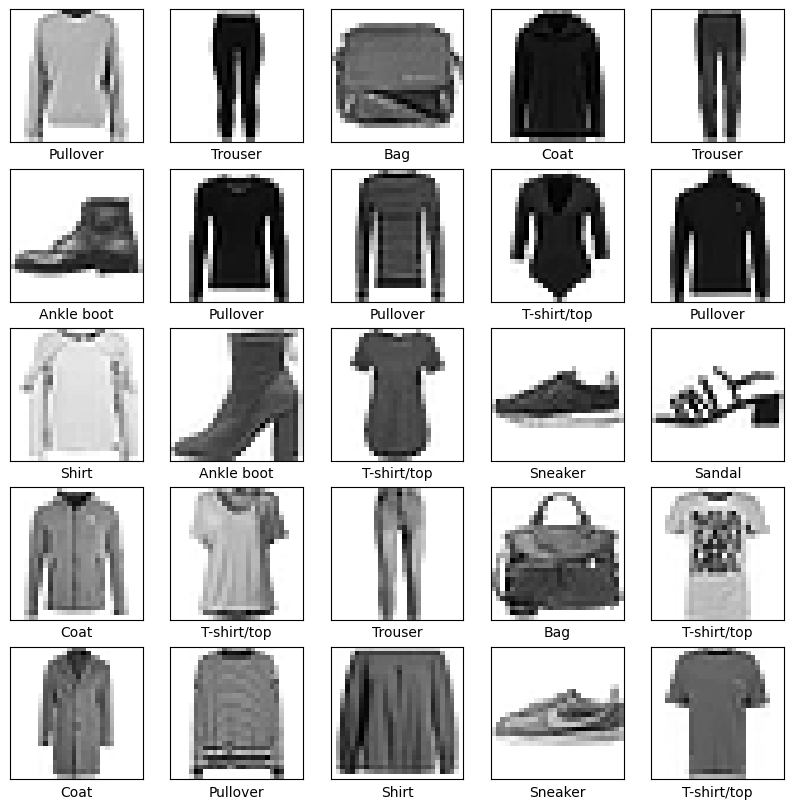

In [75]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamientos.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombre_clases[etiqueta])
plt.show()


In [76]:
# Se crea el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # 1 por que es una figura en blanco y nego
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para redes de clasificación
])

In [77]:
#Compilamos el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [78]:
num_ej_entrenamiento = metadatos.splits['train'].num_examples
num_ej_pruebas = metadatos.splits['test'].num_examples

In [79]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [80]:
Tamaño_de_lote = 42

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(Tamaño_de_lote)
datos_pruebas = datos_pruebas.batch(Tamaño_de_lote)

In [81]:
import math

historia = modelo.fit(datos_entrenamiento,epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/Tamaño_de_lote))

Epoch 1/5
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6595 - loss: 6.5785
Epoch 2/5
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7669 - loss: 0.7040
Epoch 3/5
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7907 - loss: 0.6314
Epoch 4/5
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8011 - loss: 0.6029
Epoch 5/5
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8078 - loss: 0.5603


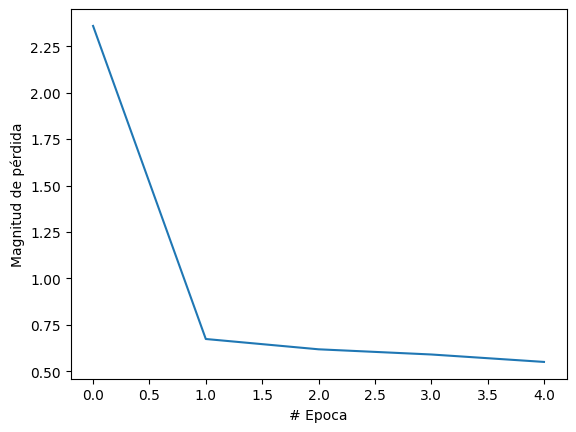

In [82]:
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historia.history['loss'])